In [1]:
import pandas as pd
import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import random 
random.seed(123)

from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings(action='ignore')

from models import custom_model1, custom_model2, efficientnet_model
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
with open('CINIC-10/X_train.pickle', 'rb') as f:
    X = pickle.load(f)

with open('CINIC-10/y_train.pickle', 'rb') as f:
    y = pickle.load(f)

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [4]:
len(X_train)

144000

In [4]:
shape = X_train.shape[1:]
number_classes=10
patience=10
min_delta=0.05

early_stop = EarlyStopping(monitor='val_accuracy', patience=patience, min_delta=min_delta)

model1=custom_model1(shape=shape, number_classes=number_classes)
model2=custom_model2(shape=shape, number_classes=number_classes)
efficentnet = efficientnet_model(shape=shape, number_classes=number_classes)

### Training testing

In [14]:
with open('history.pickle', 'wb') as file:
    pickle.dump(history_val.history, file)

In [9]:
with open('custom1_3.pickle', 'rb') as file:
    loaded_history = pickle.load(file)

In [9]:
history_model_1_bs_32 = model1.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
4500/4500 [==============================] - 1088s 239ms/step - loss: 1.6867 - accuracy: 0.4025 - val_loss: 1.4470 - val_accuracy: 0.4954
Epoch 2/30
4500/4500 [==============================] - 1084s 241ms/step - loss: 1.4465 - accuracy: 0.5163 - val_loss: 1.4789 - val_accuracy: 0.4854
Epoch 3/30
4500/4500 [==============================] - 991s 220ms/step - loss: 1.3467 - accuracy: 0.5669 - val_loss: 1.2948 - val_accuracy: 0.5761
Epoch 4/30
4500/4500 [==============================] - 996s 221ms/step - loss: 1.2838 - accuracy: 0.5979 - val_loss: 1.2412 - val_accuracy: 0.6095
Epoch 5/30
4500/4500 [==============================] - 1089s 242ms/step - loss: 1.2429 - accuracy: 0.6185 - val_loss: 1.2347 - val_accuracy: 0.6162
Epoch 6/30
4500/4500 [==============================] - 1310s 291ms/step - loss: 1.2138 - accuracy: 0.6325 - val_loss: 1.3954 - val_accuracy: 0.5804
Epoch 7/30
4500/4500 [==============================] - 1353s 301ms/step - loss: 1.1862 - accuracy: 0.6430 -

In [5]:
history_model_1_bs_64 = model1.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/30
2250/2250 [==============================] - 845s 373ms/step - loss: 1.6677 - accuracy: 0.4094 - val_loss: 1.3762 - val_accuracy: 0.5288
Epoch 2/30
2250/2250 [==============================] - 871s 387ms/step - loss: 1.4116 - accuracy: 0.5244 - val_loss: 1.4737 - val_accuracy: 0.5147
Epoch 3/30
2250/2250 [==============================] - 904s 402ms/step - loss: 1.3120 - accuracy: 0.5712 - val_loss: 1.3377 - val_accuracy: 0.5577
Epoch 4/30
2250/2250 [==============================] - 878s 390ms/step - loss: 1.2412 - accuracy: 0.6041 - val_loss: 1.1318 - val_accuracy: 0.6393
Epoch 5/30
2250/2250 [==============================] - 952s 423ms/step - loss: 1.1889 - accuracy: 0.6281 - val_loss: 1.2028 - val_accuracy: 0.6313
Epoch 6/30
2250/2250 [==============================] - 941s 418ms/step - loss: 1.1564 - accuracy: 0.6432 - val_loss: 1.2684 - val_accuracy: 0.6059
Epoch 7/30
2250/2250 [==============================] - 940s 418ms/step - loss: 1.1271 - accuracy: 0.6570 - val_

In [14]:
history_model_1_bs_128 = model1.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/30
1125/1125 [==============================] - 803s 704ms/step - loss: 1.6709 - accuracy: 0.4038 - val_loss: 1.5660 - val_accuracy: 0.4555
Epoch 2/30
1125/1125 [==============================] - 803s 714ms/step - loss: 1.4005 - accuracy: 0.5217 - val_loss: 1.3369 - val_accuracy: 0.5437
Epoch 3/30
1125/1125 [==============================] - 810s 720ms/step - loss: 1.2965 - accuracy: 0.5677 - val_loss: 1.3190 - val_accuracy: 0.5720
Epoch 4/30
1125/1125 [==============================] - 840s 747ms/step - loss: 1.2237 - accuracy: 0.6002 - val_loss: 1.1768 - val_accuracy: 0.6136
Epoch 5/30
1125/1125 [==============================] - 838s 744ms/step - loss: 1.1693 - accuracy: 0.6263 - val_loss: 1.1295 - val_accuracy: 0.6383
Epoch 6/30
1125/1125 [==============================] - 849s 755ms/step - loss: 1.1187 - accuracy: 0.6462 - val_loss: 1.2886 - val_accuracy: 0.5898
Epoch 7/30
1125/1125 [==============================] - 862s 766ms/step - loss: 1.0890 - accuracy: 0.6613 - val_

In [5]:
history_model_1_bs_256 = model1.fit(X_train, y_train, epochs=30, batch_size=256, validation_data=(X_val, y_val))

Epoch 1/30
563/563 [==============================] - 794s 1s/step - loss: 1.7035 - accuracy: 0.3890 - val_loss: 1.6169 - val_accuracy: 0.4332
Epoch 2/30
563/563 [==============================] - 822s 1s/step - loss: 1.4115 - accuracy: 0.5147 - val_loss: 1.3315 - val_accuracy: 0.5458
Epoch 3/30
563/563 [==============================] - 819s 1s/step - loss: 1.3013 - accuracy: 0.5617 - val_loss: 1.9879 - val_accuracy: 0.3943
Epoch 4/30
563/563 [==============================] - 793s 1s/step - loss: 1.2186 - accuracy: 0.5958 - val_loss: 1.1951 - val_accuracy: 0.6076
Epoch 5/30
563/563 [==============================] - 838s 1s/step - loss: 1.1592 - accuracy: 0.6220 - val_loss: 1.4238 - val_accuracy: 0.5209
Epoch 6/30
563/563 [==============================] - 834s 1s/step - loss: 1.1171 - accuracy: 0.6399 - val_loss: 1.3834 - val_accuracy: 0.5484
Epoch 7/30
563/563 [==============================] - 857s 2s/step - loss: 1.0814 - accuracy: 0.6547 - val_loss: 1.0347 - val_accuracy: 0.6629

In [6]:
history_model_2_bs_32 = model2.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/30
1932/4500 [===========>..................] - ETA: 4:01 - loss: 2.3323 - accuracy: 0.2030

KeyboardInterrupt: 

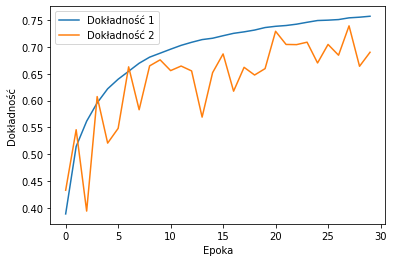

In [7]:
plt.plot(history_model_1_bs_256.history['accuracy'], label='Dokładność 1')
plt.plot(history_model_1_bs_256.history['val_accuracy'], label='Dokładność 2')
#plt.plot(loaded_history['accuracy'], label='Dokładność 2')
plt.xlabel('Epoka')
plt.ylabel('Dokładność')
plt.legend()
plt.show()

In [8]:
with open('custom1_bs_256.pickle', 'wb') as file:
    pickle.dump(history_model_1_bs_256.history, file)

In [9]:
model1.save('custom1_bs_256')

INFO:tensorflow:Assets written to: custom1_bs_256\assets


INFO:tensorflow:Assets written to: custom1_bs_256\assets


In [8]:
model_loaded = tf.keras.models.load_model('custom1_1')

OSError: No file or directory found at custom1_1

In [6]:
model1.predict(X_val)

313/313 [==============================] - 7s 21ms/step


array([[0.10153213, 0.09453216, 0.10819265, ..., 0.09890564, 0.11218525,
        0.09907582],
       [0.10346822, 0.09355432, 0.11045332, ..., 0.09677524, 0.11491128,
        0.09694487],
       [0.10313698, 0.09424294, 0.1106912 , ..., 0.09887008, 0.11783674,
        0.09601843],
       ...,
       [0.11307032, 0.09367646, 0.10349347, ..., 0.0980411 , 0.10879929,
        0.09981935],
       [0.10127231, 0.09500193, 0.10832403, ..., 0.09845277, 0.11226171,
        0.09614883],
       [0.1088462 , 0.09356121, 0.10649853, ..., 0.10181893, 0.109707  ,
        0.09575183]], dtype=float32)

#### Comparison of models with defualt parameters

Liczymy sobie 2 customowe maxymalnie i te 2 gotowe, na jakiejś sensownej liczbie epok. Powtarzamy też kilka razy, co najmniej 5 żeby uśrednić i zrobić statystyczną analizę który lepszy. 

Trenowanie: 5 razy trenujemy każdy model na defaultowych parametrach na 50 epokach. 

Wynik zapisujemy w odpowiednim folderze -> resuts/basic/nazwa_modelu/nazwa_modelu_nr.pkl
Na przykład 3 raz trenowania resnetu -> plik nazywa się resnet_3.pkl
4 raz trenowania custom2 -> custom2_4.pkl

#### Ensembling

Tutaj bym spróbował zrobić stacking z tych bazowych modeli, żeby zobaczyć czy coś pomoże. Bo jakby będą gotowe różne modele, więc czemu nie tu. Potem jak mam robić ensembling z modeli, które różnią się tylko jednym hiperparametrem to kicha.

#### Impact of training hiperparameters modififaction

Przetestujemy już na raczej TYLKO jednej architekturze wpływ dwóch hiperparametrów. Na pewno współczynnika uczenia bo łatwy. Podał przykład że można tez epoki bez poprawy, ale przy 10 epokach cieżko szukać :DD Mamy natomiast w implementacji coś takiego jak decay rate i to brzmi spoko. 

Nie wiem czy powtarzać 5 razy eskperymenty, czy tak jak Ela puścić dla jednej wartości learning rate raz na przyklad.

#### Impact of regularization hiperparametrs modification

Mamy dropout w sieci customowej, to to przetestujemy. Można jeszcze współczynnik regularyzacji jakoś, ale to wykombinuję jak potem. I też tylko na jednym modelu, bo się nie wygrzebiemy. 

#### Augmentation

Ja bym chyba zrobił porównanie modelu bez augmentacji z modelem z augmentacją dla każdego z 4 przykładów które musimy zrobić. I może wszystkich na raz z brakiem?? No nie wiem, ale to znowu DUUUŻO LICZENIA